In [187]:
########################
#PCA - Code Template
########################
import pandas as pd
import matplotlib.pyplot as plt
from sklearn. ensemble import RandomForestClassifier 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from sklearn. metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [188]:
########################
#import sample data
########################
#Import
data_path = "./Saved_files/sample_data_pca.csv"
data_for_model = pd.read_csv(data_path)
data_for_model.head()

,user_id,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
0,1,1,0.0000,0.0891,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.0001,0.0606,0.0,0.0000,0.0578,0.1554,0.0001,0.0000,0.0000
1,2,0,0.0000,0.0000,0.0,0.0,0.0,0.0001,0.0,0.0,...,0.0008,0.0000,0.0016,0.0,0.0000,0.0000,0.0030,0.0034,0.8695,0.0037
2,3,1,0.0002,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.7179,0.0000,0.0008
3,4,1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0146,0.0275,0.0060,0.0,0.1724,0.0000,0.0021,0.0012,0.0000,0.0000
4,5,1,0.0006,0.0000,0.0,0.0,0.0,0.0002,0.0,0.0,...,0.0310,0.1061,0.0000,0.0,0.0010,0.0000,0.6773,0.0000,0.0000,0.0000


In [189]:
#Shuffle data
data_for_model = shuffle(data_for_model, random_state=42)
print(data_for_model.shape)
data_for_model.head()

(356, 102)


,user_id,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
227,228,1,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,0.0000,0.0045,0.0,0.2887,0.0,0.0000,0.0000,0.0000,0.0136,0.0000
42,43,1,0.0278,0.0,0.0000,0.0000,0.0,0.0036,0.0002,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.1894,0.0000,0.0000,0.0000
256,257,1,0.0000,0.0,0.0367,0.0053,0.0,0.0000,0.0367,0.0,...,0.0000,0.0002,0.0,0.0002,0.0,0.0001,0.0000,0.0243,0.0000,0.0005
182,183,1,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0011,0.8431,0.0000,0.0000,0.0000
56,57,1,0.0007,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,0.0011,0.0163,0.0,0.0000,0.0,0.0000,0.0000,0.0179,0.8111,0.0000


In [190]:
#Class Balance
# we actually have a nice balanced data set good to know
data_for_model["purchased_album"].value_counts(normalize = True)

1    0.533708
0    0.466292
Name: purchased_album, dtype: float64

In [191]:
######################################################
# deal with missing values
######################################################
print(data_for_model.shape)
data_for_model.isna().sum()
# small number of columns with missing values, lets not impute and just drop 
# but noted 

(356, 102)


user_id            0
purchased_album    0
artist1            0
artist2            0
artist3            0
                  ..
artist96           0
artist97           0
artist98           0
artist99           0
artist100          0
Length: 102, dtype: int64

In [192]:
data_for_model.isna().sum().sum()

0

In [193]:
# "any" meaning drop the whole row if any one cell is empty
data_for_model.dropna(how="any", inplace=True)
print(data_for_model.shape)
data_for_model.head()

(356, 102)


,user_id,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
227,228,1,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,0.0000,0.0045,0.0,0.2887,0.0,0.0000,0.0000,0.0000,0.0136,0.0000
42,43,1,0.0278,0.0,0.0000,0.0000,0.0,0.0036,0.0002,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.1894,0.0000,0.0000,0.0000
256,257,1,0.0000,0.0,0.0367,0.0053,0.0,0.0000,0.0367,0.0,...,0.0000,0.0002,0.0,0.0002,0.0,0.0001,0.0000,0.0243,0.0000,0.0005
182,183,1,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0011,0.8431,0.0000,0.0000,0.0000
56,57,1,0.0007,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,0.0011,0.0163,0.0,0.0000,0.0,0.0000,0.0000,0.0179,0.8111,0.0000


In [194]:
#Drop uneccessary columns
user_id = data_for_model['user_id']
data_for_model.drop("user_id", axis = 1, inplace = True)
print(data_for_model.shape)
data_for_model.head()

(356, 101)


,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,artist9,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
227,1,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0045,0.0,0.2887,0.0,0.0000,0.0000,0.0000,0.0136,0.0000
42,1,0.0278,0.0,0.0000,0.0000,0.0,0.0036,0.0002,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.1894,0.0000,0.0000,0.0000
256,1,0.0000,0.0,0.0367,0.0053,0.0,0.0000,0.0367,0.0,0.0,...,0.0000,0.0002,0.0,0.0002,0.0,0.0001,0.0000,0.0243,0.0000,0.0005
182,1,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0,0.0011,0.8431,0.0000,0.0000,0.0000
56,1,0.0007,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0011,0.0163,0.0,0.0000,0.0,0.0000,0.0000,0.0179,0.8111,0.0000


In [195]:
######################################################
# split input variables and output variables
######################################################
# we dont want the output in the input dataframe
X = data_for_model.drop(['purchased_album'], axis=1)
Y = data_for_model['purchased_album']

In [196]:
######################################################
# split out training and test sets
######################################################
# Regression model 
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=.2,
                                                    random_state=42,
                                                    stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(284, 100)
(72, 100)
(284,)
(72,)


In [197]:
################################
#Feature Scaling ######
################################
scale_standard = StandardScaler()
x_train = scale_standard.fit_transform(x_train) # it has leanred the scaling rules 
x_test = scale_standard.transform(x_test) # transform the scaling is based on training

In [198]:
####################################
# Apply PCA
####################################

#Instantiate & fit
pca = PCA(n_components=None, #as many components as there are columns which is 100, we can refine later 
          random_state=42)
pca.fit(x_train) # we just want to check the variance at each component

PCA(random_state=42)

In [199]:
#Extract the explained variance across components
explain_variance = pca.explained_variance_ratio_
explain_variance_cumulative = pca.explained_variance_ratio_.cumsum()
print(explain_variance)
# we can plot them instead instead of trying to understand number

[8.32128763e-02 5.84421053e-02 5.71991173e-02 4.95953174e-02
 4.78795519e-02 4.52243124e-02 4.48841957e-02 4.18295673e-02
 4.00074418e-02 3.85285913e-02 3.01256942e-02 2.85283524e-02
 1.96381578e-02 1.83573237e-02 1.73586781e-02 1.63522268e-02
 1.58222473e-02 1.56724807e-02 1.50469699e-02 1.47735722e-02
 1.44753718e-02 1.36081309e-02 1.28837930e-02 1.23256157e-02
 1.14333249e-02 1.09719808e-02 1.08448594e-02 1.05238320e-02
 1.02421249e-02 1.01935816e-02 9.83860724e-03 9.32034310e-03
 9.08573945e-03 8.94898663e-03 8.78211805e-03 8.40003254e-03
 8.04595329e-03 7.75815581e-03 7.53511282e-03 7.30446282e-03
 7.03393322e-03 6.83763587e-03 6.54955903e-03 6.15848309e-03
 5.96773549e-03 5.76648708e-03 5.41963253e-03 4.80109028e-03
 4.66819648e-03 4.31468451e-03 3.98486210e-03 3.83587653e-03
 3.60001282e-03 3.36382823e-03 3.08998956e-03 2.84843960e-03
 2.21877176e-03 1.86167723e-03 1.55827755e-03 1.34647694e-03
 1.28432234e-03 1.20030801e-03 1.14076721e-03 9.81656874e-04
 8.77828797e-04 8.370849

In [200]:
print(explain_variance_cumulative)

[0.08321288 0.14165498 0.1988541  0.24844942 0.29632897 0.34155328
 0.38643748 0.42826704 0.46827449 0.50680308 0.53692877 0.56545712
 0.58509528 0.6034526  0.62081128 0.63716351 0.65298576 0.66865824
 0.68370521 0.69847878 0.71295415 0.72656228 0.73944608 0.75177169
 0.76320502 0.774177   0.78502186 0.79554569 0.80578781 0.81598139
 0.82582    0.83514035 0.84422608 0.85317507 0.86195719 0.87035722
 0.87840317 0.88616133 0.89369644 0.90100091 0.90803484 0.91487248
 0.92142203 0.92758052 0.93354825 0.93931474 0.94473437 0.94953546
 0.95420366 0.95851834 0.96250321 0.96633908 0.9699391  0.97330292
 0.97639291 0.97924135 0.98146012 0.9833218  0.98488008 0.98622656
 0.98751088 0.98871119 0.98985195 0.99083361 0.99171144 0.99254852
 0.9933518  0.99400168 0.99464947 0.99524517 0.99575096 0.9961905
 0.99661589 0.99701843 0.99738496 0.99772825 0.99803581 0.99832926
 0.99857989 0.99880984 0.99901996 0.99920376 0.99935585 0.99949182
 0.99961057 0.99970388 0.99976125 0.99981126 0.99985463 0.99989

In [201]:
################################################# 
# Plot the explained variance across components
#################################################

# create List for number of components
num_vars_list = list(range(1,101))
plt.figure(figsize=(15,10)) #size of the figure our plot will go on

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

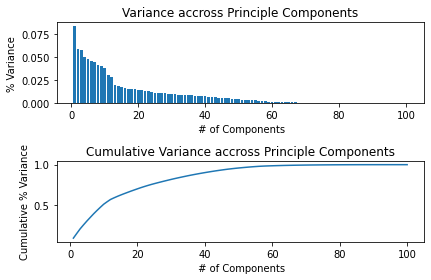

In [202]:
#plot the variance explained by each component
plt.subplot(2,1,1)
plt.bar(num_vars_list,explain_variance)
plt.title('Variance accross Principle Components')
plt.xlabel(' # of Components')
plt.ylabel('% Variance')
plt.tight_layout()

#plot the cumulative variance
plt.subplot(2,1,2)
plt.plot(num_vars_list,explain_variance_cumulative)
plt.title('Cumulative Variance accross Principle Components')
plt.xlabel(' # of Components')
plt.ylabel('Cumulative % Variance')
plt.tight_layout()
plt.show()

75% of the variance is explained by about 20 or 25 of the components

In [203]:
#################################################
# Apply PCA with selected number of components
#################################################
pca = PCA(n_components=.75,random_state=42)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
print(x_train)

[[-0.4021941  -0.75699883  0.21924717 ...  0.69928552 -0.05906372
   0.76055747]
 [-0.36007213 -1.13108387  0.40324893 ...  0.11438061 -0.07724435
   0.02465604]
 [10.69293403 -0.86657383  0.71198676 ... -1.10447554  2.30523994
   2.60770229]
 ...
 [ 1.00197218 -1.66885784  0.63427027 ... -3.40318488  0.87659913
  -2.01704601]
 [-0.75303097  3.75845543 -3.87202645 ...  1.05689123 -0.96292728
   0.42868757]
 [-0.48844855 -0.58581165  0.03826661 ...  1.41959942  0.08132504
   0.32049442]]


In [204]:
# print(x_test)

In [205]:
pca.n_components_

24

In [206]:
#################################################
# Apply PCA with selected number of components
#################################################
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [207]:
print(x_test.shape)

(72, 24)


In [208]:
#################################################
# Assess Model Accuracy
#################################################

y_pred_class = clf.predict(x_test)
accuracy_score(y_test, y_pred_class)

0.9305555555555556

In [209]:
y_pred_class.shape

(72,)

In [215]:
user_id.shape

(356,)